In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats
import calendar
import datetime

cwd = os.getcwd()
#print(cwd)

In [2]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('clean_median_sale_price_v2_df.csv', index_col=0)
data.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0


In [3]:
# Author: anderoos
# This script is meant to break up Zillow Data from the continental US into five distinct regions
# West, Midwest, Southwest, Southeast, Northeast
def split_regions(df):
    df['StateName'] = df['StateName'].astype('str')
    # Define categories
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
    midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
    southwest = ['TX', 'OK', 'AR']
    # Filters state codes into separate dataframes
    ne_df = df[df['StateName'].isin(northeast)]
    se_df = df[df['StateName'].isin(southeast)]
    mw_df = df[df['StateName'].isin(midwest)]
    w_df = df[df['StateName'].isin(west)]
    sw_df = df[df['StateName'].isin(southwest)]
    return ne_df, se_df, mw_df, w_df, sw_df

In [4]:
# Split the data into regions
ne_df, se_df, mw_df, w_df, sw_df = split_regions(data)

In [5]:
ne_df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
6,"Philadelphia, PA",PA,201567.0,195417.0,193750.0,197500.0,208000.0,219667.0,229667.0,233333.0,...,321133.0,316133.0,312467.0,308000.0,303000.0,305000.0,310667.0,322333.0,337333.0,350000.0
9,"Boston, MA",MA,315667.0,308333.0,305333.0,316000.0,330000.0,350667.0,361117.0,367783.0,...,606667.0,596667.0,586333.0,576667.0,560000.0,571417.0,593917.0,627417.0,652667.0,670167.0
26,"Pittsburgh, PA",PA,125000.0,124750.0,127083.0,131323.0,136823.0,141557.0,143483.0,143900.0,...,213000.0,206333.0,200000.0,191667.0,188333.0,191633.0,200633.0,210633.0,223667.0,232334.0
37,"Providence, RI",RI,195250.0,190750.0,188333.0,191667.0,200000.0,212800.0,219800.0,222300.0,...,399667.0,398500.0,391833.0,387167.0,381833.0,381833.0,388500.0,400500.0,417167.0,427167.0


In [6]:
ne_df_states = ne_df.drop(columns=['RegionName'])
ne_df_states = ne_df_states.groupby('StateName').mean()
#ne_df_states.to_csv("test.csv")
ne_df_states

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
CT,230396.400000,220900.000000,216250.000000,224216.600000,236333.20,252600.00,262916.800000,266850.000000,260426.60,248076.600000,...,352586.80,343746.600000,336880.00,329490.000000,323696.600000,326343.200000,336062.400000,355429.000000,379265.600000,395483.400000
MA,235460.000000,231909.800000,231479.800000,235210.000000,242590.00,248720.00,256006.800000,260223.200000,257896.80,253828.200000,...,447066.80,445493.400000,441316.20,426729.600000,420436.200000,421296.800000,434283.600000,448116.600000,467166.600000,476666.600000
ME,147183.500000,139160.250000,136760.500000,137498.000000,148654.00,155778.75,160003.750000,160003.500000,159014.50,162199.250000,...,300554.25,295141.750000,293287.50,290229.250000,295853.750000,304145.500000,316682.750000,323425.000000,333487.500000,338887.500000
NH,173633.400000,170590.000000,170976.600000,174196.600000,182389.80,188886.80,193573.400000,197010.000000,191980.00,186280.200000,...,367566.60,365000.000000,359833.20,352742.000000,347375.600000,350753.400000,355502.200000,376802.200000,393824.600000,409851.000000
NJ,225041.500000,215208.250000,214237.750000,213195.750000,224600.00,230446.00,233383.250000,231308.000000,227808.75,227780.250000,...,351162.50,341183.250000,340008.00,330720.750000,333825.000000,330458.250000,338916.750000,353312.500000,366020.750000,367054.250000
NY,132809.214286,130386.571429,129124.571429,132978.928571,135381.50,140120.00,143886.357143,145945.642857,145513.50,141858.142857,...,232251.00,228354.714286,223939.00,219153.357143,212487.928571,212613.928571,216338.928571,225595.285714,235153.928571,243230.642857
PA,130073.850000,128489.250000,126429.550000,126963.350000,131561.35,137978.20,141908.700000,141868.600000,138526.85,135628.550000,...,216099.70,213419.600000,210640.45,205762.050000,203406.500000,204034.050000,209558.250000,216144.150000,225376.650000,232599.750000
RI,195250.000000,190750.000000,188333.000000,191667.000000,200000.00,212800.00,219800.000000,222300.000000,216567.00,211233.000000,...,399667.00,398500.000000,391833.00,387167.000000,381833.000000,381833.000000,388500.000000,400500.000000,417167.000000,427167.000000


In [7]:
#author: PSam
number_of_periods = len(ne_df_states.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((ne_df_states["7/31/2023"] / 
                           ne_df_states["1/31/2013"])**(12/number_of_periods)-1)
})

top_state = growth_rate_by_state["Growth Rate"].nlargest(1).index
bottom_state = growth_rate_by_state["Growth Rate"].nsmallest(1).index

#states_to_plot = [item for sublist in [top_state, bottom_state] for item in sublist]

#top_bottom_cities = pd.DataFrame({"StateName":cities_to_plot}).set_index("StateName")
#cities_to_plot
#growth_rate_by_state.head()
#top_bottom_cities.head()

top_state

Index(['NH'], dtype='object', name='StateName')

In [8]:
# Transpose the DataFrame to have dates on the x-axis and NH values on the y-axis
top_state_df = ne_df[ne_df['StateName'] == top_state[0]]
top_state_df = top_state_df.drop(columns=["RegionName"])
top_state_df

,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
126,NH,192333.0,196000.0,196583.0,200900.0,206733.0,216617.0,222967.0,227633.0,225750.0,...,420000.0,415167.0,410167.0,399333.0,399167.0,398667.0,407833.0,421167.0,435667.0,455667.0
196,NH,168500.0,170500.0,173500.0,172150.0,170983.0,176317.0,179000.0,185333.0,181500.0,...,311333.0,313000.0,310500.0,327500.0,324000.0,330678.0,312178.0,332344.0,348167.0,375422.0
255,NH,175067.0,174400.0,176000.0,185267.0,193433.0,200900.0,204633.0,207467.0,200667.0,...,389667.0,379000.0,372333.0,360733.0,377400.0,384067.0,405167.0,401833.0,413500.0,413333.0
389,NH,159800.0,150250.0,151667.0,150833.0,167300.0,170467.0,180300.0,181317.0,171150.0,...,303333.0,295000.0,293333.0,293333.0,294667.0,297000.0,302833.0,322500.0,333500.0,336000.0
420,NH,172467.0,161800.0,157133.0,161833.0,173500.0,180133.0,180967.0,183300.0,180833.0,...,413500.0,422833.0,412833.0,382811.0,341644.0,343355.0,349500.0,406167.0,438289.0,468833.0


In [9]:
# Groupby to average the values of top state - NH
ne_top_state_gb = top_state_df.groupby("StateName").mean()

# Created forloop to assign a number to each column to calculate linear regression
num = 1

for i in range(len(ne_top_state_gb.columns)):
    ne_top_state_gb.loc["Time Period", ne_top_state_gb.columns[i]] = num
    num += 1

ne_top_state_gb


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
NH,173633.4,170590.0,170976.6,174196.6,182389.8,188886.8,193573.4,197010.0,191980.0,186280.2,...,367566.6,365000.0,359833.2,352742.0,347375.6,350753.4,355502.2,376802.2,393824.6,409851.0
Time Period,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0


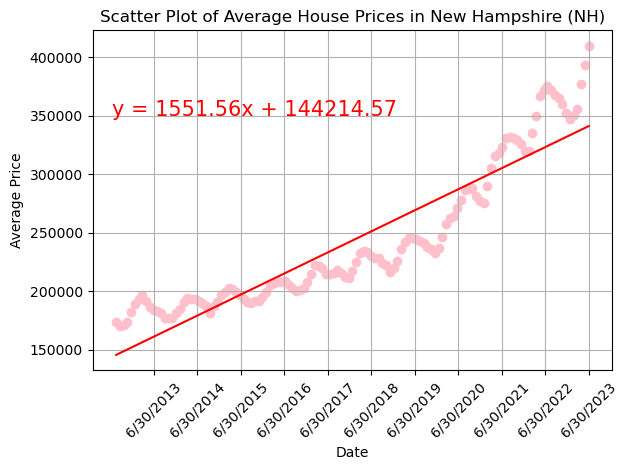

In [10]:
# Assign x and y values
x = ne_top_state_gb.loc['Time Period'].values
y = ne_top_state_gb.loc['NH'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

custom_x_ticks = ["6/30/2023", "6/30/2022", "6/30/2021","6/30/2020", "6/30/2019","6/30/2018",
                  "6/30/2017", "6/30/2016", "6/30/2015", "6/30/2014", "6/30/2013"]

# Create a scatter plot of the data points
plt.scatter(x, y, marker='o', color='pink', label='NH Average Prices')

# Add the linear regression line to the plot
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')

# y = mx + b
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 350000), fontsize=15, color="red")

plt.title('Scatter Plot of Average House Prices in New Hampshire (NH)')
plt.xlabel('Date')
plt.ylabel('Average Price')

# Set custom tick locations and labels
tick_locations = np.linspace(len(ne_top_state_gb.columns), len(custom_x_ticks), num=len(custom_x_ticks))
plt.xticks(tick_locations, custom_x_ticks, rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
value_predictions = pd.DataFrame(ne_top_state_gb["7/31/2023"])
value_predictions = value_predictions.drop("Time Period")

start_date = datetime.date(2023,8,31) # Starting from August 31, 2023
end_date = datetime.date(2025,12,31) # Ending on Dec 31, 2025
date_range = pd.date_range(start_date, end_date, freq='M')

x_places = 128

# Add columns for each month in the date range
for date in date_range:
    month_year = date.strftime('%m/%d/%Y')
    value_predictions[month_year] = round(slope, 2) * x_places + round(intercept, 2)
    x_places += 1

value_predictions = value_predictions.transpose()
value_predictions.index.name = "Month End"
value_predictions.columns.name = None

value_predictions


,NH
Month End,
7/31/2023,409851.00
08/31/2023,342814.25
09/30/2023,344365.81
10/31/2023,345917.37
11/30/2023,347468.93
12/31/2023,349020.49
01/31/2024,350572.05
02/29/2024,352123.61
03/31/2024,353675.17
